# Scenario Discovery

Sustainable flood-risk management shall anticipate the worst-case scenarios of flood properly. Therefore, we will discover worst cases scenario for Gorssel if they do not implement any of flood protection and if they implement dike heightening and/or room for the river. We do this to find out where the vulnerabilities can be found.

## Running the model

Importing all necessary libraries, checking that libraries are up-to-date, and choosing problem formulation. As before, we will choose problem formulation 5.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import time
import copy

from ema_workbench import (Model, CategoricalParameter, MultiprocessingEvaluator, Policy, Scenario,
                           ScalarOutcome, IntegerParameter, RealParameter)
from ema_workbench.analysis import prim
from dike_model_function import DikeNetwork
from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging, utilities

ema_logging.log_to_stderr(ema_logging.INFO)

from problem_formulation import get_model_for_problem_formulation

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.0.3
2.4


In [3]:
def sum_over(*args):
    return sum(args)

In [4]:
#choose problem formulation number: 5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(5)
nopolicy = [Policy("base case", **{k.name: 0 for k in dike_model.levers})]

In [5]:
uncertainties = dike_model.uncertainties
uncertainties = copy.deepcopy(dike_model.uncertainties)

In [6]:
levers = dike_model.levers 
levers = copy.deepcopy(dike_model.levers)

In [7]:
def aggregate_outcomes(results, outcome):
    ''' This function aggregates the outcomes across locations and across each timestep. 
    The input are the results of a model run, the outcomes is a selected outcome. 
    A dataframe including disaggregated and aggregated results will be returned.'''
    
    list_outcomes_columns = []

    for i in results.columns:
        if outcome in i:
            list_outcomes_columns.append(i)

    results["Total " + str(outcome)
            ] = results[list_outcomes_columns].sum(axis=1)

## Exploring Scenarios under the Base Case

In [8]:
#load open exploration datasets of basecase scenarios
basecase = utilities.load_results('BaseCase_1000_PF5')
expbasecase, outcomesbasecase = basecase
outcomesbasecase = pd.DataFrame(outcomesbasecase)
expbasecase = pd.DataFrame(expbasecase)
results_basecase = expbasecase.join(outcomesbasecase)
results_basecase = results_basecase.drop(columns="model")
results_basecase.head()

[MainProcess/INFO] results loaded succesfully from C:\Users\Paula\Documents\GitHub\common_MBDM\final assignment\BaseCase_1000_PF5


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_Dike Investment Costs 3,A.3_Expected Number of Deaths 3,A.4_Expected Annual Damage 3,A.4_Dike Investment Costs 3,A.4_Expected Number of Deaths 3,A.5_Expected Annual Damage 3,A.5_Dike Investment Costs 3,A.5_Expected Number of Deaths 3,RfR Total Costs 3,Expected Evacuation Costs 3
0,85.0,346.078772,1.0,0.675984,266.477718,10.0,0.800023,338.223938,1.5,0.069049,...,0,1.146792,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
1,8.0,30.028143,1.5,0.859666,166.507073,1.0,0.068389,236.214399,10.0,0.216362,...,0,0.157227,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
2,99.0,88.834003,1.5,0.679894,102.430192,10.0,0.502623,194.539239,1.5,0.693799,...,0,0.010514,1.895164e+07,0,0.011292,0.000000e+00,0,0.000000,0.0,0.0
3,124.0,253.011207,10.0,0.856555,216.003097,10.0,0.704073,275.449093,1.5,0.604649,...,0,0.058224,2.059539e+07,0,0.015772,0.000000e+00,0,0.000000,0.0,0.0
4,49.0,254.962619,10.0,0.402276,323.220951,1.0,0.913708,62.174443,1.5,0.712240,...,0,0.000000,0.000000e+00,0,0.000000,1.408909e+07,0,0.023467,0.0,0.0


Since the results of the basecase are provided for all locations, we will select our outcomes of interest - the aggregate outcomes and disaggregated outcomes concerning dike ring 4.

In [9]:
#selecting the outcome of interest
req_vars=[]
a4 = "A.4"
ead="Expected Annual Damage"
ed = "Expected Number of Deaths"
for cols in results_basecase.columns:
    if a4 in cols:
        if ead in cols: 
            req_vars.append(cols)
        if ed in cols:
            req_vars.append(cols)

results_bcA4=results_basecase[req_vars]

aggregate_outcomes(results_bcA4, "Expected Annual Damage")
aggregate_outcomes(results_bcA4, "Expected Number of Deaths")

C:\Users\Paula\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [10]:
results_bcA4

,A.4_Expected Annual Damage 0,A.4_Expected Number of Deaths 0,A.4_Expected Annual Damage 1,A.4_Expected Number of Deaths 1,A.4_Expected Annual Damage 2,A.4_Expected Number of Deaths 2,A.4_Expected Annual Damage 3,A.4_Expected Number of Deaths 3,Total Expected Annual Damage,Total Expected Number of Deaths
0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
1,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
2,1.651674e+07,0.011292,1.451373e+07,0.011292,1.651674e+07,0.011292,1.895164e+07,0.011292,6.649885e+07,0.045166
3,1.824028e+07,0.015772,2.689291e+07,0.015772,2.343772e+07,0.015772,2.059539e+07,0.015772,8.916630e+07,0.063089
4,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...
995,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
996,1.180295e+06,0.000915,1.354294e+06,0.000915,1.037159e+06,0.000915,1.354294e+06,0.000915,4.926043e+06,0.003660
997,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
998,3.758552e+07,0.022791,2.925073e+07,0.022791,3.758552e+07,0.022791,4.312638e+07,0.022791,1.475482e+08,0.091162


### Discovering the worst-Expected Annual Damage (EAD) scenarios in the base case

We first have to set a threshold to classify our worst-case scenarios for the EAD. We want to choose the 10% worst cases. Thus, the percentile is chosen to be 90%.

In [11]:
#identifying the threshold of EAD for the worst case as 10% highest
np.percentile(results_bcA4['Total Expected Annual Damage'], 90)

63362510.42249434

The Patient Rule Induction Algorithm (PRIM) is used to for the scenario discovery. We set the minimium coverage threshold that a box should meet to 0.8 and the peel_aplha of 0.1 indicates that 10% of the data is peeled off after each iteration of the algorithm.

In [33]:
#only select the outcomes of interest and the worst case EAD
x = expbasecase.iloc[:, 0:19]
y = results_bcA4.iloc[:, 8] > np.percentile(results_bcA4['Total Expected Annual Damage'], 90)

y = y.values

prim_wcbc_ead = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box_wcbc_ead = prim_wcbc_ead.find_box()

[MainProcess/INFO] 1000 points remaining, containing 100 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.054, coverage: 0.54, density: 1.0 restricted_dimensions: 4


In [34]:
worstead = results_bcA4[y==True]
worstead

,A.4_Expected Annual Damage 0,A.4_Expected Number of Deaths 0,A.4_Expected Annual Damage 1,A.4_Expected Number of Deaths 1,A.4_Expected Annual Damage 2,A.4_Expected Number of Deaths 2,A.4_Expected Annual Damage 3,A.4_Expected Number of Deaths 3,Total Expected Annual Damage,Total Expected Number of Deaths
2,1.651674e+07,0.011292,1.451373e+07,0.011292,1.651674e+07,0.011292,1.895164e+07,0.011292,6.649885e+07,0.045166
3,1.824028e+07,0.015772,2.689291e+07,0.015772,2.343772e+07,0.015772,2.059539e+07,0.015772,8.916630e+07,0.063089
12,1.975161e+07,0.012171,1.975161e+07,0.012171,1.339665e+07,0.012171,1.975161e+07,0.012171,7.265149e+07,0.048683
33,2.349824e+07,0.018226,2.653225e+07,0.018226,2.349824e+07,0.018226,3.464509e+07,0.018226,1.081738e+08,0.072903
35,3.260330e+07,0.018717,2.537334e+07,0.018717,2.537334e+07,0.018717,2.864945e+07,0.018717,1.119994e+08,0.074869
...,...,...,...,...,...,...,...,...,...,...
937,2.809680e+07,0.015840,2.151737e+07,0.015840,2.151737e+07,0.015840,2.809680e+07,0.015840,9.922832e+07,0.063361
948,3.066916e+07,0.024194,4.521767e+07,0.024194,3.066916e+07,0.024194,3.066916e+07,0.024194,1.372252e+08,0.096775
955,2.340395e+07,0.012764,1.821400e+07,0.012764,2.685416e+07,0.012764,2.056572e+07,0.012764,8.903784e+07,0.051057
975,2.378466e+07,0.018522,2.378466e+07,0.018522,2.378466e+07,0.018522,2.685564e+07,0.018522,9.820962e+07,0.074087


#### Trade-off plot between coverage and denisty for the first box

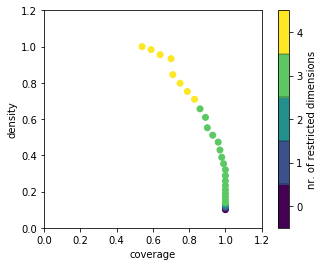

In [35]:
box_wcbc_ead.show_tradeoff()
plt.show()

The plot shows that most points include three restricted dimensions. Our goal is to further inspect a point with a high coverage and a high density.

As the interactive plot did not work for us, we use a table to follow the peeling trajectory.

In [36]:
box_wcbc_ead.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.00,0.100000,0,1.000,0.100000,0
1,1.00,0.111111,1,0.900,0.111111,1
2,1.00,0.123457,2,0.810,0.123457,2
3,1.00,0.137174,3,0.729,0.137174,3
4,1.00,0.152439,4,0.656,0.152439,3
5,1.00,0.169492,5,0.590,0.169492,3
6,1.00,0.188324,6,0.531,0.188324,3
7,1.00,0.209644,7,0.477,0.209644,3
8,1.00,0.233100,8,0.429,0.233100,3
9,1.00,0.259067,9,0.386,0.259067,3


We selected point 24 as it has more than 70% coverage and more than 90% density. If we choose any other point either the coverage or the density would decrease significantly. This box we want to further explore.

coverage         0.7
density     0.933333
id                24
mass           0.075
mean        0.933333
res_dim            4
Name: 24, dtype: object

             box 24                                          
                min       max                       qp values
A.4_pfail  0.000635  0.192943  [-1.0, 3.8769374154909923e-41]
A.1_pfail  0.405325  0.999587   [9.636898565944264e-11, -1.0]
A.3_pfail  0.275624  0.999658    [8.70654408899938e-06, -1.0]
A.2_pfail  0.113410  0.999049     [0.15542980468225037, -1.0]



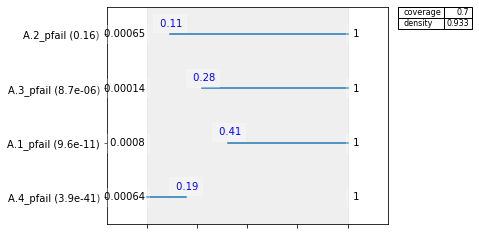

In [37]:
box_wcbc_ead.inspect(24)
box_wcbc_ead.inspect(24, style='graph')
plt.show()

The inspection of the box shows:
 - dike failure probability for dike 4 is lower compared to other dike failure probability. Also, the range is lower lower.
 - qp values for the dike failure probability of dike ring 2 is higher than 0.05. Thus,they are not significant and we need to discover what happens if we drop this restirction. 

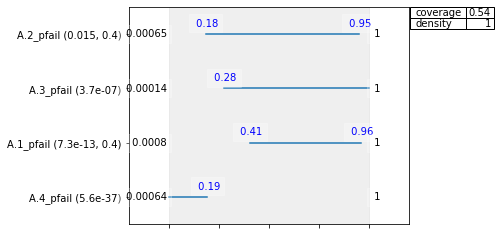

In [38]:
box_wcbc_ead.inspect(style = 'graph')
box_wcbc_ead.drop_restriction('A.2_pfail')

After dropping the restriction the range of values for the dike failure probability for dike ring 2 decreased to 0.18 - 0.95.

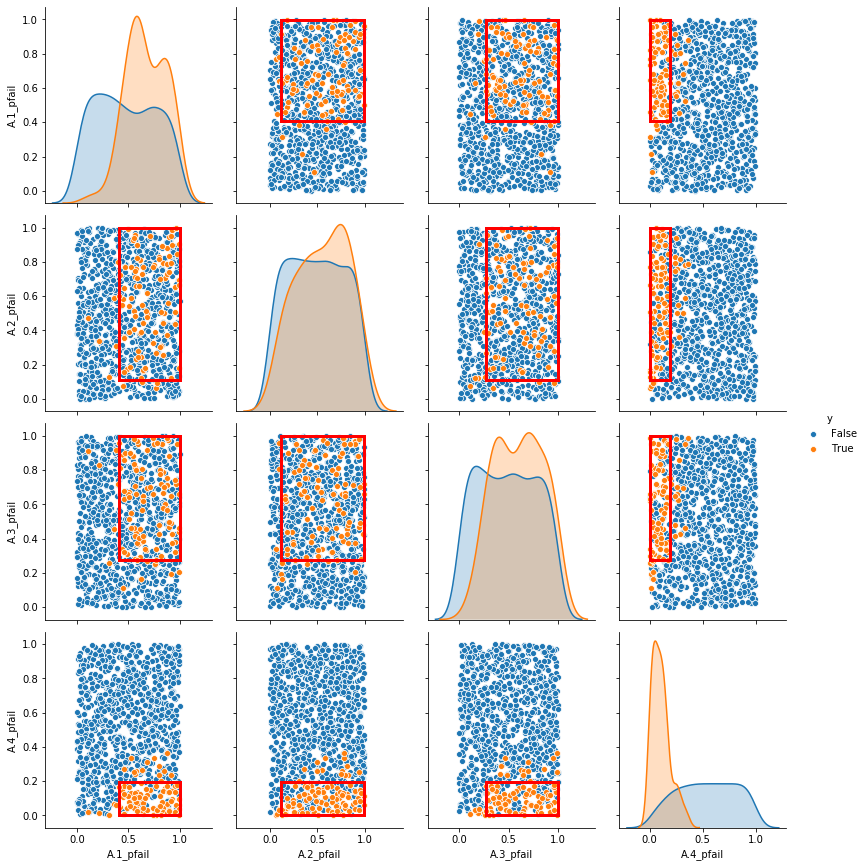

In [26]:
box_wcbc_ead.select(24)
box_wcbc_ead.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

The pair scatter plot indicates that the worst EAD might be occured when the dike failure probability at dike ring 4 is low, dike failure probability at dike ring 1 is high and dike failure probability at dike ring 3 not low.

#### Finding another box for inspections

In [18]:
otherbox = prim_wcbc_ead.find_box()

[MainProcess/INFO] 925 points remaining, containing 30 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.328125, returning dump box


As the found box does not meet the threshold critera of 80% coverage. Thus, we choose to explore the boxes manually.

In [19]:
prim_wcbc_ead.boxes_to_dataframe()

box 1                  box 2          
                  min       max          min       max
A.4_pfail  0.00063521  0.192943   0.00063521  0.999022
A.1_pfail    0.405325  0.999587  0.000802391  0.999587
A.3_pfail    0.275624  0.999658  0.000142751  0.999658
A.2_pfail     0.11341  0.999049  0.000653078  0.999049

In [36]:
a = expbasecase.iloc[box_wcbc_ead.yi]
a = a.iloc[:,0:19]
b = results_bcA4.iloc[box_wcbc_ead.yi]
worst_ead = a.join(b)
worst_ead
worst_ead.to_csv('Worst EAD.csv')

The scenarios that are part of the worst EAD are saved in a csv file to be able to reuse the results.

In [37]:
worst_ead

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_Expected Annual Damage 0,A.4_Expected Number of Deaths 0,A.4_Expected Annual Damage 1,A.4_Expected Number of Deaths 1,A.4_Expected Annual Damage 2,A.4_Expected Number of Deaths 2,A.4_Expected Annual Damage 3,A.4_Expected Number of Deaths 3,Total Expected Annual Damage,Total Expected Number of Deaths
3,124.0,253.011207,10.0,0.856555,216.003097,10.0,0.704073,275.449093,1.5,0.604649,...,1.824028e+07,0.015772,2.689291e+07,0.015772,2.343772e+07,0.015772,2.059539e+07,0.015772,8.916630e+07,0.063089
24,122.0,95.390439,1.0,0.698152,70.364529,1.5,0.961340,196.509870,1.5,0.894200,...,1.227979e+07,0.010869,1.227979e+07,0.010869,1.386530e+07,0.010869,1.227979e+07,0.010869,5.070467e+07,0.043474
33,41.0,330.060624,1.5,0.572942,200.632578,10.0,0.233538,217.870246,1.5,0.438413,...,2.349824e+07,0.018226,2.653225e+07,0.018226,2.349824e+07,0.018226,3.464509e+07,0.018226,1.081738e+08,0.072903
37,105.0,103.466085,1.5,0.448492,323.730308,1.5,0.580525,57.845670,1.5,0.888587,...,3.443061e+07,0.019583,2.636799e+07,0.019583,3.000698e+07,0.019583,3.443061e+07,0.019583,1.252362e+08,0.078332
78,82.0,188.470552,10.0,0.443273,157.104190,1.5,0.550683,171.290289,1.5,0.339229,...,2.140672e+07,0.013949,2.456251e+07,0.013949,1.665967e+07,0.013949,1.665967e+07,0.013949,7.928857e+07,0.055794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,102.0,151.080617,10.0,0.958589,121.894170,1.5,0.508603,307.528483,1.5,0.743627,...,2.011207e+07,0.015179,2.011207e+07,0.015179,2.288769e+07,0.015179,2.288769e+07,0.015179,8.599951e+07,0.060716
937,80.0,318.922385,1.5,0.555222,99.733761,1.0,0.409141,112.559218,10.0,0.837856,...,2.809680e+07,0.015840,2.151737e+07,0.015840,2.151737e+07,0.015840,2.809680e+07,0.015840,9.922832e+07,0.063361
948,98.0,168.402902,1.5,0.646101,158.846379,1.5,0.442710,227.785172,10.0,0.414360,...,3.066916e+07,0.024194,4.521767e+07,0.024194,3.066916e+07,0.024194,3.066916e+07,0.024194,1.372252e+08,0.096775
975,7.0,35.131307,1.0,0.518044,260.517472,1.5,0.189671,225.207990,10.0,0.901195,...,2.378466e+07,0.018522,2.378466e+07,0.018522,2.378466e+07,0.018522,2.685564e+07,0.018522,9.820962e+07,0.074087


### Discovering the worst-Expected Number of Deaths (END) scenarios in the base case

We first have to set a threshold to classify our worst-case scenarios for the END. We want to choose the 10% worst cases. Thus, the percentile is chosen to be 90%. In this way, we are choosing the best worst case scenario.

In [42]:
x = expbasecase.iloc[:, 0:19]
y = results_bcA4.iloc[:, 9] > np.percentile(results_bcA4['Total Expected Number of Deaths'], 90)

y = y.values
prim_wcbc_end = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box_wcbc_end = prim_wcbc_end.find_box()

[MainProcess/INFO] 1000 points remaining, containing 100 cases of interest
[MainProcess/INFO] mean: 0.9714285714285714, mass: 0.07, coverage: 0.68, density: 0.9714285714285714 restricted_dimensions: 4


In [43]:
worstend = results_bcA4[y==True]
worstend

,A.4_Expected Annual Damage 0,A.4_Expected Number of Deaths 0,A.4_Expected Annual Damage 1,A.4_Expected Number of Deaths 1,A.4_Expected Annual Damage 2,A.4_Expected Number of Deaths 2,A.4_Expected Annual Damage 3,A.4_Expected Number of Deaths 3,Total Expected Annual Damage,Total Expected Number of Deaths
2,1.651674e+07,0.011292,1.451373e+07,0.011292,1.651674e+07,0.011292,1.895164e+07,0.011292,6.649885e+07,0.045166
3,1.824028e+07,0.015772,2.689291e+07,0.015772,2.343772e+07,0.015772,2.059539e+07,0.015772,8.916630e+07,0.063089
12,1.975161e+07,0.012171,1.975161e+07,0.012171,1.339665e+07,0.012171,1.975161e+07,0.012171,7.265149e+07,0.048683
23,1.642924e+07,0.011164,1.443684e+07,0.011164,1.443684e+07,0.011164,1.443684e+07,0.011164,5.973977e+07,0.044656
33,2.349824e+07,0.018226,2.653225e+07,0.018226,2.349824e+07,0.018226,3.464509e+07,0.018226,1.081738e+08,0.072903
...,...,...,...,...,...,...,...,...,...,...
937,2.809680e+07,0.015840,2.151737e+07,0.015840,2.151737e+07,0.015840,2.809680e+07,0.015840,9.922832e+07,0.063361
948,3.066916e+07,0.024194,4.521767e+07,0.024194,3.066916e+07,0.024194,3.066916e+07,0.024194,1.372252e+08,0.096775
955,2.340395e+07,0.012764,1.821400e+07,0.012764,2.685416e+07,0.012764,2.056572e+07,0.012764,8.903784e+07,0.051057
975,2.378466e+07,0.018522,2.378466e+07,0.018522,2.378466e+07,0.018522,2.685564e+07,0.018522,9.820962e+07,0.074087


#### Trade-off plot between coverage and denisty for the first box

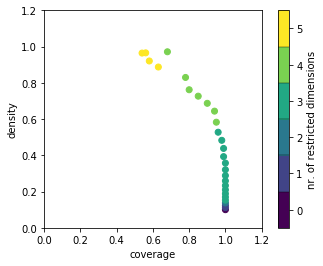

In [44]:
box_wcbc_end.show_tradeoff()
plt.show()

In [45]:
box_wcbc_end.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.00,0.100000,0,1.000,0.100000,0
1,1.00,0.111111,1,0.900,0.111111,1
2,1.00,0.123457,2,0.810,0.123457,1
3,1.00,0.137174,3,0.729,0.137174,2
4,1.00,0.152439,4,0.656,0.152439,3
5,1.00,0.169492,5,0.590,0.169492,3
6,1.00,0.188324,6,0.531,0.188324,3
7,1.00,0.209644,7,0.477,0.209644,3
8,1.00,0.233100,8,0.429,0.233100,3
9,1.00,0.259067,9,0.386,0.259067,3


We select point 22 as it has more than 70% coverage and more than 80% density. If we choose the point with the higher density, the coverage would decrease significantly.

coverage        0.78
density     0.829787
id                22
mass           0.094
mean        0.829787
res_dim            4
Name: 22, dtype: object

             box 22                                         
                min       max                      qp values
A.4_pfail  0.000635  0.264685  [-1.0, 9.581991586889209e-34]
A.1_pfail  0.428274  0.999587  [9.399548981827508e-12, -1.0]
A.3_pfail  0.278676  0.999658   [2.15662074068368e-05, -1.0]
A.2_pfail  0.121137  0.999049    [0.06670664676028783, -1.0]



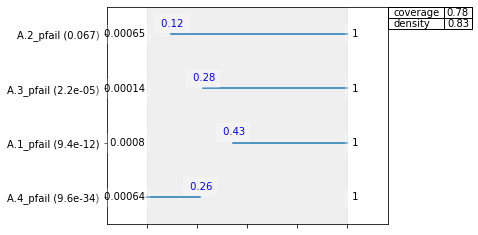

In [46]:
box_wcbc_end.inspect(22)
box_wcbc_end.inspect(22, style='graph')
plt.show()

Again, the qp values for the dike failure probability for dike ring 2 is slightly higher than 0.05. Thus it is not significant and needs to be dropped.

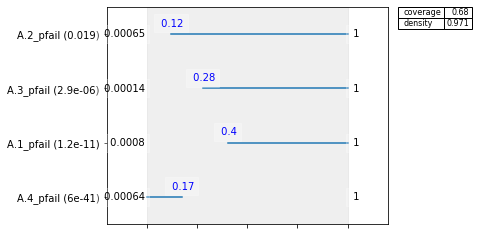

In [47]:
box_wcbc_end.inspect(style = 'graph')
box_wcbc_end.drop_restriction('A.2_pfail')

The ranges for the dike failure probability of dike ring 4 and 1 decrease. The dike failure probability for dike ring 2 is not changed.

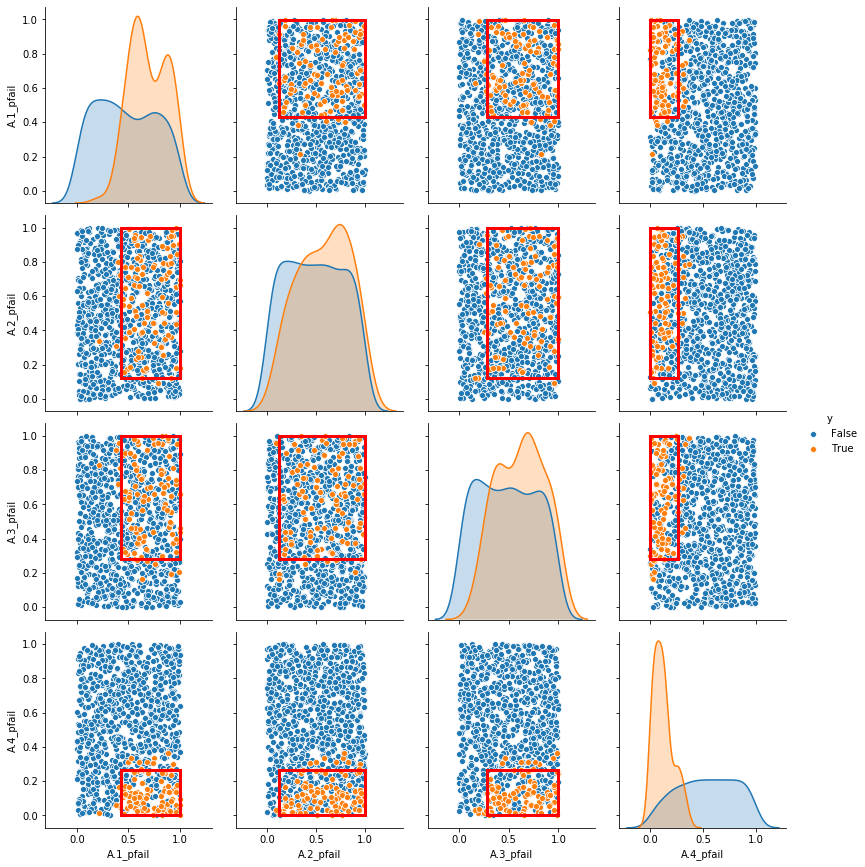

In [26]:
box_wcbc_end.select(22)
box_wcbc_end.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

The pair scatter plot indicates that the worst END might be occured when the dike failure probability at dike ring 4 is low, dike failure probability at dike ring 1 is high and dike failure probability at dike ring 3 not low.

#### Finding another box for inspections

In [27]:
otherbox = prim_wcbc_end.find_box()

[MainProcess/INFO] 906 points remaining, containing 22 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.3392857142857143, returning dump box


As the found box does not meet the threshold critera of 80% coverage, we choose to explore the boxes manually.

In [28]:
prim_wcbc_end.boxes_to_dataframe()

box 1                  box 2          
                  min       max          min       max
A.4_pfail  0.00063521  0.264685   0.00063521  0.999022
A.1_pfail    0.428274  0.999587  0.000802391  0.999587
A.3_pfail    0.278676  0.999658  0.000142751  0.999658
A.2_pfail    0.121137  0.999049  0.000653078  0.999049

In [32]:
worst_end

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.4_DikeIncrease 3,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,A.5_DikeIncrease 3,scenario,policy,model
3,124.0,253.011207,10.0,0.856555,216.003097,10.0,0.704073,275.449093,1.5,0.604649,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,base case,dikesnet
24,122.0,95.390439,1.0,0.698152,70.364529,1.5,0.961340,196.509870,1.5,0.894200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74,base case,dikesnet
26,7.0,208.728219,1.0,0.613203,120.893577,1.0,0.209300,91.821676,1.0,0.568355,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76,base case,dikesnet
33,41.0,330.060624,1.5,0.572942,200.632578,10.0,0.233538,217.870246,1.5,0.438413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83,base case,dikesnet
37,105.0,103.466085,1.5,0.448492,323.730308,1.5,0.580525,57.845670,1.5,0.888587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87,base case,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,80.0,318.922385,1.5,0.555222,99.733761,1.0,0.409141,112.559218,10.0,0.837856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,987,base case,dikesnet
942,131.0,275.810604,10.0,0.480138,177.088855,1.0,0.698592,204.542097,1.5,0.791865,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,992,base case,dikesnet
948,98.0,168.402902,1.5,0.646101,158.846379,1.5,0.442710,227.785172,10.0,0.414360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,998,base case,dikesnet
975,7.0,35.131307,1.0,0.518044,260.517472,1.5,0.189671,225.207990,10.0,0.901195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1025,base case,dikesnet


In [33]:
results_bcA4.iloc[box_wcbc_end.yi]

,A.4_Expected Annual Damage 0,A.4_Expected Number of Deaths 0,A.4_Expected Annual Damage 1,A.4_Expected Number of Deaths 1,A.4_Expected Annual Damage 2,A.4_Expected Number of Deaths 2,A.4_Expected Annual Damage 3,A.4_Expected Number of Deaths 3,Total Expected Annual Damage,Total Expected Number of Deaths
3,1.824028e+07,0.015772,2.689291e+07,0.015772,2.343772e+07,0.015772,2.059539e+07,0.015772,8.916630e+07,0.063089
24,1.227979e+07,0.010869,1.227979e+07,0.010869,1.386530e+07,0.010869,1.227979e+07,0.010869,5.070467e+07,0.043474
26,4.626732e+06,0.003482,4.626732e+06,0.003482,4.097659e+06,0.003482,4.626732e+06,0.003482,1.797786e+07,0.013929
33,2.349824e+07,0.018226,2.653225e+07,0.018226,2.349824e+07,0.018226,3.464509e+07,0.018226,1.081738e+08,0.072903
37,3.443061e+07,0.019583,2.636799e+07,0.019583,3.000698e+07,0.019583,3.443061e+07,0.019583,1.252362e+08,0.078332
...,...,...,...,...,...,...,...,...,...,...
937,2.809680e+07,0.015840,2.151737e+07,0.015840,2.151737e+07,0.015840,2.809680e+07,0.015840,9.922832e+07,0.063361
942,1.439189e+07,0.011128,1.274615e+07,0.011128,1.637808e+07,0.011128,1.274615e+07,0.011128,5.626227e+07,0.044510
948,3.066916e+07,0.024194,4.521767e+07,0.024194,3.066916e+07,0.024194,3.066916e+07,0.024194,1.372252e+08,0.096775
975,2.378466e+07,0.018522,2.378466e+07,0.018522,2.378466e+07,0.018522,2.685564e+07,0.018522,9.820962e+07,0.074087


In [35]:
a = expbasecase.iloc[box_wcbc_end.yi]
a = a.iloc[:
           ,0:19]
b = results_bcA4.iloc[box_wcbc_end.yi]
worst_end = a.join(b)
worst_end
worst_end.to_csv('Worst END.csv')

The scenarios that are part of the worst EAD are saved in a csv file to be able to reuse the results.

## Exploring Scenarios under the 20 random policies

In [68]:
#load open exploration datasets of scenarios with 20 policies
pol20 = utilities.load_results('20Policies_1000_PF5')
exppol20, outcomespol20 = pol20
outcomespol20 = pd.DataFrame(outcomespol20)
exppol20 = pd.DataFrame(exppol20)

[MainProcess/INFO] results loaded succesfully from C:\Users\Paula\Documents\GitHub\common_MBDM\final assignment\20Policies_1000_PF5


Since the results of the basecase are provided for all locations, we will select our outcomes of interest - the aggregate outcomes and disaggregated outcomes concerning dike ring 4.

In [69]:
#selecting the outcome of interest
req_vars=[]
a4 = "A.4"
ead="Expected Annual Damage"
ed = "Expected Number of Deaths"
cost = "Dike Investment Costs"

for cols in outcomespol20.columns:
    if a4 in cols:
        if ead in cols: 
            req_vars.append(cols)
        if ed in cols:
            req_vars.append(cols)
        if cost in cols:
            req_vars.append(cols)

outcomes_pol20A4=outcomespol20[req_vars]

In [70]:
outcomespol20

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,...,A.3_Dike Investment Costs 3,A.3_Expected Number of Deaths 3,A.4_Expected Annual Damage 3,A.4_Dike Investment Costs 3,A.4_Expected Number of Deaths 3,A.5_Expected Annual Damage 3,A.5_Dike Investment Costs 3,A.5_Expected Number of Deaths 3,RfR Total Costs 3,Expected Evacuation Costs 3
0,0.0,4.229151e+07,0.0,2.513131e+05,0,0.000056,0.000000e+00,4.421502e+07,0.000000,0.000000e+00,...,1.024182e+08,0.0,0.0,3.732140e+07,0.0,0.0,7.475907e+07,0.0,115300000.0,0.0
1,0.0,4.229151e+07,0.0,5.071908e+04,0,0.000009,0.000000e+00,4.421502e+07,0.000000,0.000000e+00,...,1.024182e+08,0.0,0.0,3.732140e+07,0.0,0.0,7.475907e+07,0.0,115300000.0,0.0
2,0.0,4.229151e+07,0.0,2.251295e+07,0,0.003514,0.000000e+00,4.421502e+07,0.000000,0.000000e+00,...,1.024182e+08,0.0,0.0,3.732140e+07,0.0,0.0,7.475907e+07,0.0,115300000.0,0.0
3,0.0,4.229151e+07,0.0,3.513498e+06,0,0.000672,0.000000e+00,4.421502e+07,0.000000,0.000000e+00,...,1.024182e+08,0.0,0.0,3.732140e+07,0.0,0.0,7.475907e+07,0.0,115300000.0,0.0
4,0.0,4.229151e+07,0.0,2.528547e+06,0,0.000372,0.000000e+00,4.421502e+07,0.000000,0.000000e+00,...,1.024182e+08,0.0,0.0,3.732140e+07,0.0,0.0,7.475907e+07,0.0,115300000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,6.071731e+07,0.0,0.000000e+00,66045103,0.000000,7.573489e+06,0.000000e+00,0.003058,0.000000e+00,...,3.475022e+07,0.0,0.0,1.308373e+07,0.0,0.0,3.608318e+07,0.0,377300000.0,0.0
19996,0.0,6.071731e+07,0.0,0.000000e+00,66045103,0.000000,1.839006e+07,0.000000e+00,0.004933,0.000000e+00,...,3.475022e+07,0.0,0.0,1.308373e+07,0.0,0.0,3.608318e+07,0.0,377300000.0,0.0
19997,0.0,6.071731e+07,0.0,0.000000e+00,66045103,0.000000,4.519479e+06,0.000000e+00,0.001858,1.230734e+07,...,3.475022e+07,0.0,0.0,1.308373e+07,0.0,0.0,3.608318e+07,0.0,377300000.0,0.0
19998,0.0,6.071731e+07,0.0,8.754842e+05,66045103,0.000151,0.000000e+00,0.000000e+00,0.000000,5.344275e+05,...,3.475022e+07,0.0,0.0,1.308373e+07,0.0,0.0,3.608318e+07,0.0,377300000.0,0.0


In [71]:
outcomes_pol20A4

,A.4_Expected Annual Damage 0,A.4_Dike Investment Costs 0,A.4_Expected Number of Deaths 0,A.4_Expected Annual Damage 1,A.4_Dike Investment Costs 1,A.4_Expected Number of Deaths 1,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.4_Expected Annual Damage 3,A.4_Dike Investment Costs 3,A.4_Expected Number of Deaths 3
0,0.000000e+00,1.814408e+07,0.000000,0.000000e+00,1.703077e+07,0.000000,0.0,1.399317e+07,0.0,0.0,3.732140e+07,0.0
1,0.000000e+00,1.814408e+07,0.000000,0.000000e+00,1.703077e+07,0.000000,0.0,1.399317e+07,0.0,0.0,3.732140e+07,0.0
2,0.000000e+00,1.814408e+07,0.000000,0.000000e+00,1.703077e+07,0.000000,0.0,1.399317e+07,0.0,0.0,3.732140e+07,0.0
3,0.000000e+00,1.814408e+07,0.000000,0.000000e+00,1.703077e+07,0.000000,0.0,1.399317e+07,0.0,0.0,3.732140e+07,0.0
4,0.000000e+00,1.814408e+07,0.000000,0.000000e+00,1.703077e+07,0.000000,0.0,1.399317e+07,0.0,0.0,3.732140e+07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,9.695195e+06,0.000000,0.0,2.075411e+07,0.0,0.0,1.308373e+07,0.0
19996,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,9.695195e+06,0.000000,0.0,2.075411e+07,0.0,0.0,1.308373e+07,0.0
19997,1.230734e+07,0.000000e+00,0.001158,2.231878e+06,9.695195e+06,0.000195,0.0,2.075411e+07,0.0,0.0,1.308373e+07,0.0
19998,5.344275e+05,0.000000e+00,0.000045,0.000000e+00,9.695195e+06,0.000000,0.0,2.075411e+07,0.0,0.0,1.308373e+07,0.0


In [72]:
aggregate_outcomes(outcomes_pol20A4, "Expected Annual Damage")
aggregate_outcomes(outcomes_pol20A4, "Expected Number of Deaths")
aggregate_outcomes(outcomespol20, "Expected Evacuation Costs")
aggregate_outcomes(outcomes_pol20A4, "Dike Investment Costs")
aggregate_outcomes(outcomespol20, "RfR Total Costs")
outcomes_pol20A4['Total Flood Protection Costs'] = outcomes_pol20A4['Total Dike Investment Costs']+ outcomespol20['Total RfR Total Costs']/5 + outcomespol20['Total Expected Evacuation Costs']/5

C:\Users\Paula\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Paula\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
outcomes_pol20A4

,A.4_Expected Annual Damage 0,A.4_Dike Investment Costs 0,A.4_Expected Number of Deaths 0,A.4_Expected Annual Damage 1,A.4_Dike Investment Costs 1,A.4_Expected Number of Deaths 1,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.4_Expected Annual Damage 3,A.4_Dike Investment Costs 3,A.4_Expected Number of Deaths 3,Total Expected Annual Damage,Total Expected Number of Deaths,Total Dike Investment Costs,Total Flood Protection Costs
0,0.000000e+00,1.814408e+07,0.000000,0.000000e+00,1.703077e+07,0.000000,0.0,1.399317e+07,0.0,0.0,3.732140e+07,0.0,0.000000e+00,0.000000,8.648942e+07,3.510294e+08
1,0.000000e+00,1.814408e+07,0.000000,0.000000e+00,1.703077e+07,0.000000,0.0,1.399317e+07,0.0,0.0,3.732140e+07,0.0,0.000000e+00,0.000000,8.648942e+07,3.510294e+08
2,0.000000e+00,1.814408e+07,0.000000,0.000000e+00,1.703077e+07,0.000000,0.0,1.399317e+07,0.0,0.0,3.732140e+07,0.0,0.000000e+00,0.000000,8.648942e+07,3.510299e+08
3,0.000000e+00,1.814408e+07,0.000000,0.000000e+00,1.703077e+07,0.000000,0.0,1.399317e+07,0.0,0.0,3.732140e+07,0.0,0.000000e+00,0.000000,8.648942e+07,3.510295e+08
4,0.000000e+00,1.814408e+07,0.000000,0.000000e+00,1.703077e+07,0.000000,0.0,1.399317e+07,0.0,0.0,3.732140e+07,0.0,0.000000e+00,0.000000,8.648942e+07,3.510302e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,9.695195e+06,0.000000,0.0,2.075411e+07,0.0,0.0,1.308373e+07,0.0,0.000000e+00,0.000000,4.353304e+07,3.107732e+08
19996,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,9.695195e+06,0.000000,0.0,2.075411e+07,0.0,0.0,1.308373e+07,0.0,0.000000e+00,0.000000,4.353304e+07,3.107733e+08
19997,1.230734e+07,0.000000e+00,0.001158,2.231878e+06,9.695195e+06,0.000195,0.0,2.075411e+07,0.0,0.0,1.308373e+07,0.0,1.453922e+07,0.001354,4.353304e+07,3.107735e+08
19998,5.344275e+05,0.000000e+00,0.000045,0.000000e+00,9.695195e+06,0.000000,0.0,2.075411e+07,0.0,0.0,1.308373e+07,0.0,5.344275e+05,0.000045,4.353304e+07,3.107731e+08


### Comparing the worst-case situation in basecase scenarios and with-policy scenarios. 
For the comparison the 90% percentile and the max value are used. As the printed results show, the outcomes are always better, in this case lower, if policies are implemented

In [74]:
a = np.percentile(results_bcA4['Total Expected Annual Damage'], 90) #base case's EAD 90 percentile
b = np.percentile(outcomes_pol20A4['Total Expected Annual Damage'], 90) #with-policy's EAD 90 percentile
c = max(results_bcA4['Total Expected Annual Damage']) #base case's max EAD 
d = max(outcomes_pol20A4['Total Expected Annual Damage']) #with-policy's max EAD
e = np.percentile(results_bcA4['Total Expected Number of Deaths'], 90) #base case's END 90 percentile
f = np.percentile(outcomes_pol20A4['Total Expected Number of Deaths'], 90) #with-policy's END 90 percentile
g = max(results_bcA4['Total Expected Number of Deaths']) #base case's max END
h = max(outcomes_pol20A4['Total Expected Number of Deaths']) #with-policy's max END
print (f"Base case's EAD 90 percentile: {a}, while with-policy: {b}")
print (f"Base case's max EAD: {c}, while with-policy: {d}")
print (f"Base case's END 90 percentile: {e}, while with-policy: {f}")
print (f"Base case's max END: {g}, while with-policy: {h}")

Base case's EAD 90 percentile: 63362510.42249434, while with-policy: 1205710.713209885
Base case's max EAD: 165815838.1866392, while with-policy: 81732337.04834083
Base case's END 90 percentile: 0.04451420510983045, while with-policy: 0.00021508870763203
Base case's max END: 0.099526144491387, while with-policy: 0.021501287366189614


### Discovering the worst-Expected Number of Deaths (END) scenarios in the base case under 20 random policies

As before mentioned, the 90% percentile is chosen to choose the best worst-case scenario.

In [75]:
np.percentile(outcomes_pol20A4['Total Expected Number of Deaths'], 90)

0.00021508870763203

In [76]:
xpol20 = exppol20.iloc[:, 0:19]
xpol20 = xpol20.join(exppol20['policy'])
ypol20 = outcomes_pol20A4.iloc[:, 13] > np.percentile(outcomes_pol20A4['Total Expected Number of Deaths'], 90)

ypol20 = ypol20.values
prim_bcpol20_end = prim.Prim(xpol20, ypol20, threshold=0.8, peel_alpha=0.1)
box_bcpol20_end = prim_bcpol20_end.find_box()

[MainProcess/INFO] 20000 points remaining, containing 2000 cases of interest
[MainProcess/INFO] mean: 0.9666030534351145, mass: 0.0524, coverage: 0.5065, density: 0.9666030534351145 restricted_dimensions: 2


In [77]:
worstendpol20 = outcomes_pol20A4[ypol20==True]
worstendpol20

,A.4_Expected Annual Damage 0,A.4_Dike Investment Costs 0,A.4_Expected Number of Deaths 0,A.4_Expected Annual Damage 1,A.4_Dike Investment Costs 1,A.4_Expected Number of Deaths 1,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.4_Expected Annual Damage 3,A.4_Dike Investment Costs 3,A.4_Expected Number of Deaths 3,Total Expected Annual Damage,Total Expected Number of Deaths,Total Dike Investment Costs,Total Flood Protection Costs
176,1.911015e+06,1.814408e+07,0.000229,0.000000e+00,1.703077e+07,0.000000,0.0,1.399317e+07,0.0,0.0,3.732140e+07,0.0,1.911015e+06,0.000229,8.648942e+07,3.510295e+08
911,2.386052e+06,1.814408e+07,0.000218,0.000000e+00,1.703077e+07,0.000000,0.0,1.399317e+07,0.0,0.0,3.732140e+07,0.0,2.386052e+06,0.000218,8.648942e+07,3.510303e+08
2176,1.676601e+06,1.610892e+07,0.000555,2.833140e+05,9.593246e+06,0.000072,0.0,1.548896e+07,0.0,0.0,1.604874e+07,0.0,1.959915e+06,0.000627,5.723987e+07,3.950199e+08
2359,1.147220e+06,1.610892e+07,0.000261,0.000000e+00,9.593246e+06,0.000000,0.0,1.548896e+07,0.0,0.0,1.604874e+07,0.0,1.147220e+06,0.000261,5.723987e+07,3.950199e+08
2911,2.126765e+06,1.610892e+07,0.000545,4.620118e+05,9.593246e+06,0.000114,0.0,1.548896e+07,0.0,0.0,1.604874e+07,0.0,2.588777e+06,0.000659,5.723987e+07,3.950207e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19967,2.882118e+06,0.000000e+00,0.000275,0.000000e+00,9.695195e+06,0.000000,0.0,2.075411e+07,0.0,0.0,1.308373e+07,0.0,2.882118e+06,0.000275,4.353304e+07,3.107731e+08
19968,1.071431e+07,0.000000e+00,0.000959,1.418096e+06,9.695195e+06,0.000105,0.0,2.075411e+07,0.0,0.0,1.308373e+07,0.0,1.213241e+07,0.001063,4.353304e+07,3.107734e+08
19983,4.620989e+06,0.000000e+00,0.000406,0.000000e+00,9.695195e+06,0.000000,0.0,2.075411e+07,0.0,0.0,1.308373e+07,0.0,4.620989e+06,0.000406,4.353304e+07,3.107733e+08
19986,5.911498e+06,0.000000e+00,0.000594,2.163175e+05,9.695195e+06,0.000024,0.0,2.075411e+07,0.0,0.0,1.308373e+07,0.0,6.127815e+06,0.000618,4.353304e+07,3.107732e+08


#### Trade-off plot between coverage and denisty for the first box

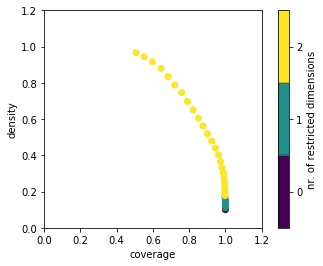

In [78]:
box_bcpol20_end.show_tradeoff()
plt.show()

In [79]:
box_bcpol20_end.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.0000,0.100000,0,1.00000,0.100000,0
1,1.0000,0.111111,1,0.90000,0.111111,1
2,1.0000,0.123457,2,0.81000,0.123457,1
3,1.0000,0.137174,3,0.72900,0.137174,1
4,1.0000,0.152439,4,0.65600,0.152439,1
5,0.9975,0.169068,5,0.59000,0.169068,1
6,0.9975,0.177966,6,0.56050,0.177966,2
7,0.9975,0.187853,7,0.53100,0.187853,2
8,0.9975,0.198903,8,0.50150,0.198903,2
9,0.9975,0.211335,9,0.47200,0.211335,2


We select point 26 as it has more than 70% coverage and density. If we choose the point with the higher density, the coverage would decrease significantly.

coverage        0.72
density     0.788177
id                26
mass         0.09135
mean        0.788177
res_dim            2
Name: 26, dtype: object

                                      box 26  \
                                         min   
A.4_pfail                        0.000692442   
policy     {4, 7, 8, 10, 11, 13, 14, 16, 19}   

                                                                              
                                         max                       qp values  
A.4_pfail                           0.202864                     [-1.0, 0.0]  
policy     {4, 7, 8, 10, 11, 13, 14, 16, 19}  [2.497909134890325e-296, -1.0]  



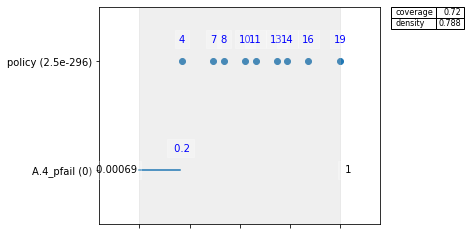

In [80]:
box_bcpol20_end.inspect(26)
box_bcpol20_end.inspect(26, style='graph')
plt.show()

All qp values are significant, so no restrictions need to be dropped. 

policy [4, 7, 8, 10, 11, 13, 14, 16, 19, 0, 1, 2, 3, 5, 6, 9, 12, 15, 17, 18]


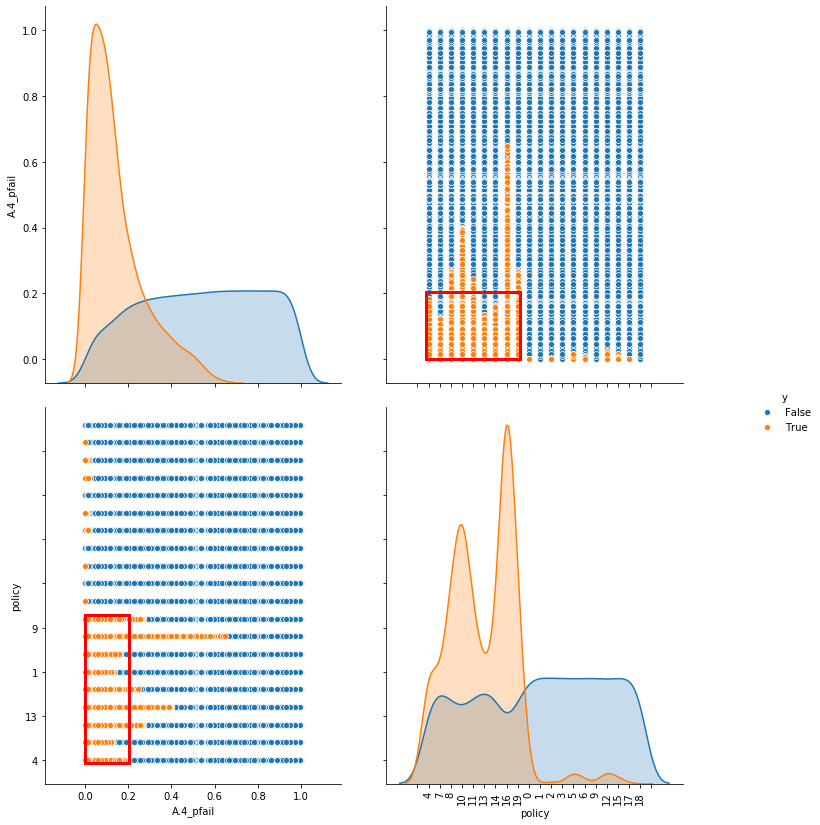

In [81]:
box_bcpol20_end.select(26)
box_bcpol20_end.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

### Discovering the worst-Expected Annual Damage (EAD) scenarios in the base case under 20 random policies
As before mentioned, the 90% percentile is chosen to choose the best worst-case scenario.

In [82]:
np.percentile(outcomes_pol20A4['Total Expected Annual Damage'], 90)

1205710.713209885

In [84]:
xpol20 = exppol20.iloc[:, 0:19]
xpol20 = xpol20.join(exppol20['policy'])
ypol20 = outcomes_pol20A4.iloc[:, 12] > np.percentile(outcomes_pol20A4['Total Expected Annual Damage'], 90)

ypol20 = ypol20.values
prim_bcpol20_ead = prim.Prim(xpol20, ypol20, threshold=0.8, peel_alpha=0.1)
box_bcpol20_ead = prim_bcpol20_ead.find_box()

[MainProcess/INFO] 20000 points remaining, containing 2000 cases of interest
[MainProcess/INFO] mean: 0.9847328244274809, mass: 0.0524, coverage: 0.516, density: 0.9847328244274809 restricted_dimensions: 2


In [85]:
worsteadpol20 = outcomes_pol20A4[ypol20==True]
worsteadpol20

,A.4_Expected Annual Damage 0,A.4_Dike Investment Costs 0,A.4_Expected Number of Deaths 0,A.4_Expected Annual Damage 1,A.4_Dike Investment Costs 1,A.4_Expected Number of Deaths 1,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.4_Expected Annual Damage 3,A.4_Dike Investment Costs 3,A.4_Expected Number of Deaths 3,Total Expected Annual Damage,Total Expected Number of Deaths,Total Dike Investment Costs,Total Flood Protection Costs
176,1.911015e+06,1.814408e+07,0.000229,0.000000e+00,1.703077e+07,0.000000,0.0,1.399317e+07,0.0,0.0,3.732140e+07,0.0,1.911015e+06,0.000229,8.648942e+07,3.510295e+08
911,2.386052e+06,1.814408e+07,0.000218,0.000000e+00,1.703077e+07,0.000000,0.0,1.399317e+07,0.0,0.0,3.732140e+07,0.0,2.386052e+06,0.000218,8.648942e+07,3.510303e+08
2176,1.676601e+06,1.610892e+07,0.000555,2.833140e+05,9.593246e+06,0.000072,0.0,1.548896e+07,0.0,0.0,1.604874e+07,0.0,1.959915e+06,0.000627,5.723987e+07,3.950199e+08
2911,2.126765e+06,1.610892e+07,0.000545,4.620118e+05,9.593246e+06,0.000114,0.0,1.548896e+07,0.0,0.0,1.604874e+07,0.0,2.588777e+06,0.000659,5.723987e+07,3.950207e+08
4006,1.269668e+06,7.332080e+06,0.000109,1.125806e+06,0.000000e+00,0.000111,0.0,1.036910e+07,0.0,0.0,1.186070e+07,0.0,2.395474e+06,0.000220,2.956188e+07,3.367820e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19983,4.620989e+06,0.000000e+00,0.000406,0.000000e+00,9.695195e+06,0.000000,0.0,2.075411e+07,0.0,0.0,1.308373e+07,0.0,4.620989e+06,0.000406,4.353304e+07,3.107733e+08
19985,1.670546e+06,0.000000e+00,0.000183,0.000000e+00,9.695195e+06,0.000000,0.0,2.075411e+07,0.0,0.0,1.308373e+07,0.0,1.670546e+06,0.000183,4.353304e+07,3.107731e+08
19986,5.911498e+06,0.000000e+00,0.000594,2.163175e+05,9.695195e+06,0.000024,0.0,2.075411e+07,0.0,0.0,1.308373e+07,0.0,6.127815e+06,0.000618,4.353304e+07,3.107732e+08
19993,2.427790e+06,0.000000e+00,0.000178,0.000000e+00,9.695195e+06,0.000000,0.0,2.075411e+07,0.0,0.0,1.308373e+07,0.0,2.427790e+06,0.000178,4.353304e+07,3.107732e+08


#### Trade-off plot between coverage and denisty for the first box

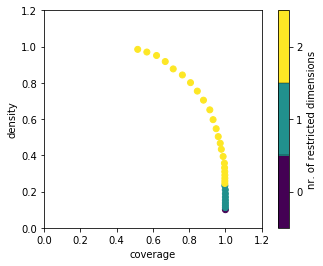

In [86]:
box_bcpol20_ead.show_tradeoff()
plt.show()

In [87]:
box_bcpol20_ead.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.0000,0.100000,0,1.00000,0.100000,0
1,1.0000,0.111111,1,0.90000,0.111111,1
2,1.0000,0.123457,2,0.81000,0.123457,1
3,1.0000,0.137174,3,0.72900,0.137174,1
4,1.0000,0.152439,4,0.65600,0.152439,1
5,1.0000,0.169492,5,0.59000,0.169492,1
6,1.0000,0.188324,6,0.53100,0.188324,1
7,0.9995,0.209539,7,0.47700,0.209539,1
8,0.9970,0.232401,8,0.42900,0.232401,1
9,0.9970,0.244633,9,0.40755,0.244633,2


We select point 25 as it has more than 80% coverage and density, as it is the only point that provides 80% cpverage and density. In all other cases, trade-offs would have to be made.

coverage      0.8075
density     0.801091
id                25
mass          0.1008
mean        0.801091
res_dim            2
Name: 25, dtype: object

                                   box 25                                  \
                                      min                             max   
A.4_pfail                     0.000692442                        0.251985   
policy     {4, 8, 10, 11, 13, 14, 16, 19}  {4, 8, 10, 11, 13, 14, 16, 19}   

                        
             qp values  
A.4_pfail  [-1.0, 0.0]  
policy     [0.0, -1.0]  



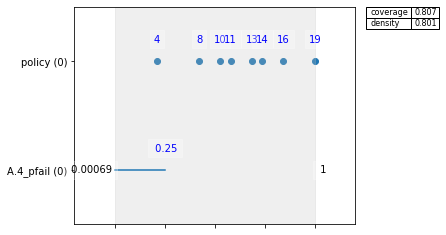

In [88]:
box_bcpol20_ead.inspect(25)
box_bcpol20_ead.inspect(25, style='graph')
plt.show()

policy [4, 8, 10, 11, 13, 14, 16, 19, 0, 1, 2, 3, 5, 6, 7, 9, 12, 15, 17, 18]


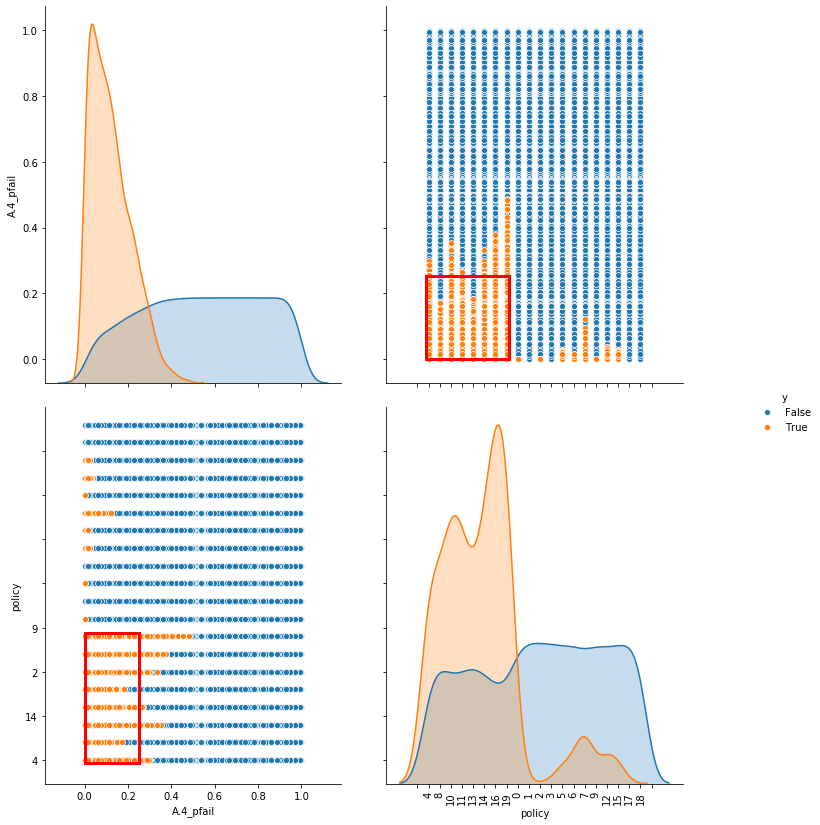

In [89]:
box_bcpol20_ead.select(25)
box_bcpol20_ead.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

### Discovering the worst-Total Flood Protection Costs (FPC) scenarios in the base case under 20 random policies

Furthermore, we try to do a scenario discovery for the total flood protection costs.

In [90]:
np.percentile(outcomes_pol20A4['Total Expected Annual Damage'], 90)

1205710.713209885

In [92]:
xpol20 = exppol20.iloc[:, 0:19]
xpol20 = xpol20.join(exppol20['policy'])
ypol20 = outcomes_pol20A4.iloc[:, 15] > np.percentile(outcomes_pol20A4['Total Flood Protection Costs'], 90)

ypol20 = ypol20.values
prim_bcpol20_fpc = prim.Prim(xpol20, ypol20, threshold=0.8, peel_alpha=0.1)
box_bcpol20_fpc = prim_bcpol20_fpc.find_box()

[MainProcess/INFO] 20000 points remaining, containing 2000 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.1, coverage: 1.0, density: 1.0 restricted_dimensions: 1


In [93]:
worstfpcpol20 = outcomes_pol20A4[ypol20==True]
worstfpcpol20

,A.4_Expected Annual Damage 0,A.4_Dike Investment Costs 0,A.4_Expected Number of Deaths 0,A.4_Expected Annual Damage 1,A.4_Dike Investment Costs 1,A.4_Expected Number of Deaths 1,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.4_Expected Annual Damage 3,A.4_Dike Investment Costs 3,A.4_Expected Number of Deaths 3,Total Expected Annual Damage,Total Expected Number of Deaths,Total Dike Investment Costs,Total Flood Protection Costs
1000,0.0,1.610892e+07,0.0,0.0,2.373960e+07,0.0,0.0,2.228294e+07,0.0,0.0,4.414885e+07,0.0,0.0,0.0,1.062803e+08,4.266403e+08
1001,0.0,1.610892e+07,0.0,0.0,2.373960e+07,0.0,0.0,2.228294e+07,0.0,0.0,4.414885e+07,0.0,0.0,0.0,1.062803e+08,4.266403e+08
1002,0.0,1.610892e+07,0.0,0.0,2.373960e+07,0.0,0.0,2.228294e+07,0.0,0.0,4.414885e+07,0.0,0.0,0.0,1.062803e+08,4.266403e+08
1003,0.0,1.610892e+07,0.0,0.0,2.373960e+07,0.0,0.0,2.228294e+07,0.0,0.0,4.414885e+07,0.0,0.0,0.0,1.062803e+08,4.266403e+08
1004,0.0,1.610892e+07,0.0,0.0,2.373960e+07,0.0,0.0,2.228294e+07,0.0,0.0,4.414885e+07,0.0,0.0,0.0,1.062803e+08,4.266404e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.0,1.610892e+07,0.0,0.0,1.106038e+07,0.0,0.0,1.223340e+07,0.0,0.0,2.578448e+07,0.0,0.0,0.0,6.518718e+07,4.456472e+08
17996,0.0,1.610892e+07,0.0,0.0,1.106038e+07,0.0,0.0,1.223340e+07,0.0,0.0,2.578448e+07,0.0,0.0,0.0,6.518718e+07,4.456472e+08
17997,0.0,1.610892e+07,0.0,0.0,1.106038e+07,0.0,0.0,1.223340e+07,0.0,0.0,2.578448e+07,0.0,0.0,0.0,6.518718e+07,4.456472e+08
17998,0.0,1.610892e+07,0.0,0.0,1.106038e+07,0.0,0.0,1.223340e+07,0.0,0.0,2.578448e+07,0.0,0.0,0.0,6.518718e+07,4.456472e+08


#### Trade-off plot between coverage and denisty for the first box

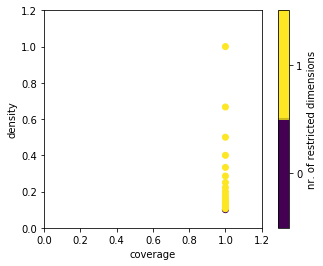

In [94]:
box_bcpol20_fpc.show_tradeoff()
plt.show()

As the trade-off plot shows, the trade-off plot between density and coverage does not give further insight. Therefore, we stop our analysis of the flood protection costs at this point.

## Discovering policies which lead to desired outcomes

The following outcomes are desired:
- Minimum Total Expected Number of Deaths
- Minimum Total Expected Annual Damage
- Minimum Total Flood Protection Costs

### Total Expected Number of Deaths

In [155]:
np.percentile(outcomes_pol20A4['Total Expected Number of Deaths'], 10)

0.0

In [162]:
xpol20 = exppol20.iloc[:, 20:60]
ypol20 = outcomes_pol20A4.iloc[:, 13] <= np.percentile(outcomes_pol20A4['Total Expected Number of Deaths'], 10)

ypol20 = ypol20.values
prim_bcpol20_end = prim.Prim(xpol20, ypol20, threshold=0.8, peel_alpha=0.1)
box_bcpol20_end = prim_bcpol20_end.find_box()

[MainProcess/INFO] 20000 points remaining, containing 15720 cases of interest
[MainProcess/INFO] mean: 0.999, mass: 0.05, coverage: 0.06354961832061069, density: 0.999 restricted_dimensions: 6


In [163]:
bestend = outcomes_pol20A4[ypol20==True]
bestend

,A.4_Expected Annual Damage 0,A.4_Dike Investment Costs 0,A.4_Expected Number of Deaths 0,A.4_Expected Annual Damage 1,A.4_Dike Investment Costs 1,A.4_Expected Number of Deaths 1,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.4_Expected Annual Damage 3,A.4_Dike Investment Costs 3,A.4_Expected Number of Deaths 3,Total Expected Annual Damage,Total Expected Number of Deaths,Total Dike Investment Costs,Total Flood Protection Costs
0,0.0,1.814408e+07,0.0,0.0,1.703077e+07,0.0,0.0,1.399317e+07,0.0,0.0,3.732140e+07,0.0,0.0,0.0,1.729788e+08,7.020589e+08
1,0.0,1.814408e+07,0.0,0.0,1.703077e+07,0.0,0.0,1.399317e+07,0.0,0.0,3.732140e+07,0.0,0.0,0.0,1.729788e+08,7.020588e+08
2,0.0,1.814408e+07,0.0,0.0,1.703077e+07,0.0,0.0,1.399317e+07,0.0,0.0,3.732140e+07,0.0,0.0,0.0,1.729788e+08,7.020597e+08
3,0.0,1.814408e+07,0.0,0.0,1.703077e+07,0.0,0.0,1.399317e+07,0.0,0.0,3.732140e+07,0.0,0.0,0.0,1.729788e+08,7.020590e+08
4,0.0,1.814408e+07,0.0,0.0,1.703077e+07,0.0,0.0,1.399317e+07,0.0,0.0,3.732140e+07,0.0,0.0,0.0,1.729788e+08,7.020604e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,0.0,0.000000e+00,0.0,0.0,9.695195e+06,0.0,0.0,2.075411e+07,0.0,0.0,1.308373e+07,0.0,0.0,0.0,8.706608e+07,6.215516e+08
19992,0.0,0.000000e+00,0.0,0.0,9.695195e+06,0.0,0.0,2.075411e+07,0.0,0.0,1.308373e+07,0.0,0.0,0.0,8.706608e+07,6.215516e+08
19994,0.0,0.000000e+00,0.0,0.0,9.695195e+06,0.0,0.0,2.075411e+07,0.0,0.0,1.308373e+07,0.0,0.0,0.0,8.706608e+07,6.215604e+08
19995,0.0,0.000000e+00,0.0,0.0,9.695195e+06,0.0,0.0,2.075411e+07,0.0,0.0,1.308373e+07,0.0,0.0,0.0,8.706608e+07,6.215463e+08


#### Trade-off plot between coverage and denisty for the first box

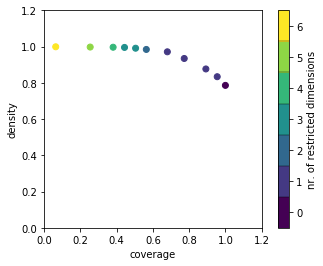

In [164]:
box_bcpol20_end.show_tradeoff()
plt.show()

In [165]:
box_bcpol20_end.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.786000,0,1.00,0.786000,0
1,0.954835,0.833889,1,0.90,0.833889,1
2,0.892239,0.876625,2,0.80,0.876625,1
3,0.772774,0.934462,3,0.65,0.934462,1
4,0.679644,0.971273,4,0.55,0.971273,1
5,0.563550,0.984333,5,0.45,0.984333,2
6,0.504389,0.991125,6,0.40,0.991125,3
7,0.443257,0.995429,7,0.35,0.995429,3
8,0.380344,0.996500,8,0.30,0.996500,4
9,0.253817,0.997500,9,0.20,0.997500,5


We select point 3 as it has more than 70% coverage and more 90 % density, as it is the only point that provides 80% cpverage and density. In all other cases, trade-offs would have to be made. 

coverage    0.772774
density     0.934462
id                 3
mass            0.65
mean        0.934462
res_dim            1
Name: 3, dtype: object

                   box 3                   
                     min   max    qp values
A.4_DikeIncrease 0   3.5  10.0  [0.0, -1.0]



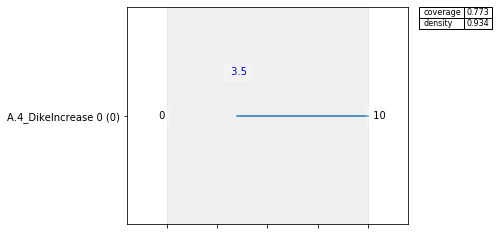

In [166]:
#selecting point which has more than 70% coverage and density, and 
box_bcpol20_end.inspect(3)
box_bcpol20_end.inspect(3, style='graph')
plt.show()

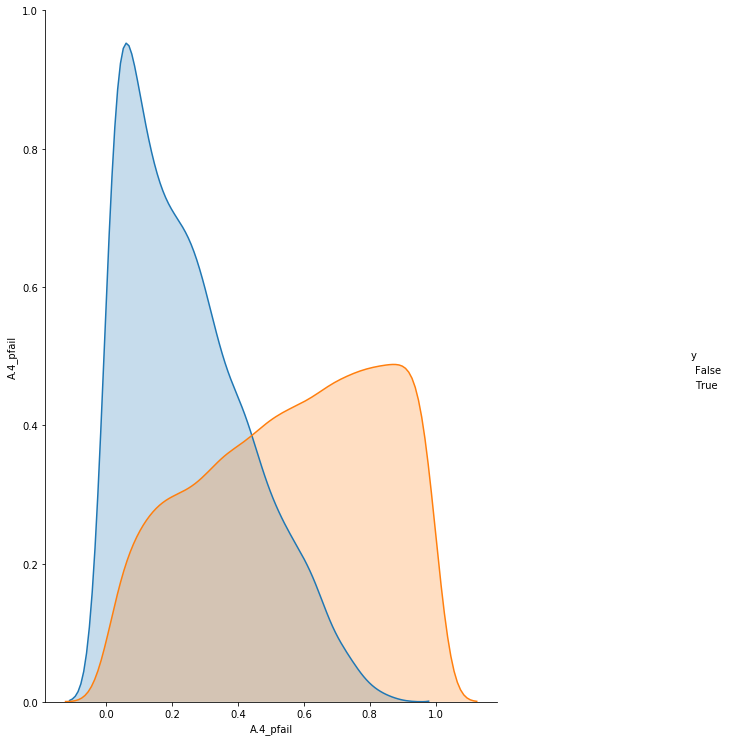

In [161]:
box_bcpol20_end.select(8)
box_bcpol20_end.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

The pair scatter plot does not give any insight. Therefore, we will stop our discovery of total number of expected deaths.